In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
def get_result_dataframe(dataset_name, model_name, path):
    results = []

    n_folds = len(glob(path + "validation_fold_*.csv"))
    print(n_folds)
    for i in range(n_folds):
        results_val = pd.read_csv(path + f"validation_fold_{i}.csv")

        results_val = results_val.groupby("alpha").apply(lambda x: x.sort_values("score", ascending=False).head(1), include_groups = False).reset_index()
        alpha_list = results_val.alpha.tolist()
        best_models = results_val.model.tolist()

        results_test = pd.read_csv(path + f"test_fold_{i}.csv")
        for alpha, m in zip(alpha_list, best_models):
            best_model = results_test[((results_test.alpha == alpha) & (results_test.model == m))]
            results.append({
                "fold" : i,
                "alpha" : alpha,
                "bal_acc" : best_model.bal_acc.values[0],
                "min_bal_acc" : best_model.min_bal_acc.values[0]
            })

    results = pd.DataFrame(results).groupby("alpha").mean().reset_index()
    return results

10
10
10
10
10
10
10
10
10


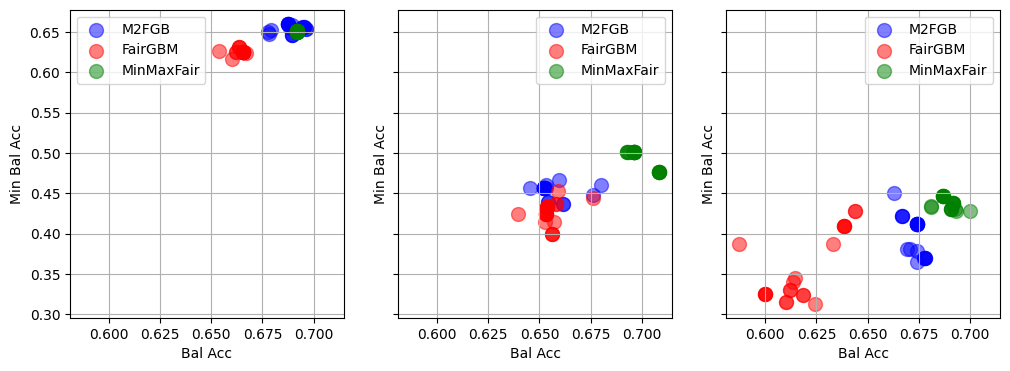

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), sharex = True, sharey = True)


dataset_name = "german"
for i, n_groups in enumerate([2, 4, 8]):
    model_name = "M2FGB_grad"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    results_m2fgb = get_result_dataframe(dataset_name, model_name, path)

    model_name = "FairGBMClassifier"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    results_fairgbm = get_result_dataframe(dataset_name, model_name, path)

    model_name = "MinMaxFair"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    results_mmfair = get_result_dataframe(dataset_name, model_name, path)


    axs[i].scatter(
        results_m2fgb.bal_acc,
        results_m2fgb.min_bal_acc,
        c = "blue",
        s = 100,
        alpha = 0.5,
        label = "M2FGB"
    )

    axs[i].scatter(
        results_fairgbm.bal_acc,
        results_fairgbm.min_bal_acc,
        c = "red",
        s = 100,
        alpha = 0.5,
        label = "FairGBM",
    )


    axs[i].scatter(
        results_mmfair.bal_acc,
        results_mmfair.min_bal_acc,
        c = "green",
        s = 100,
        alpha = 0.5,
        label = "MinMaxFair",
    )

    axs[i].legend()
    axs[i].set_xlabel("Bal Acc")
    axs[i].set_ylabel("Min Bal Acc")
    axs[i].grid(True)
plt.show()


## Compas

10
10
10
10
10
10
10
10
10


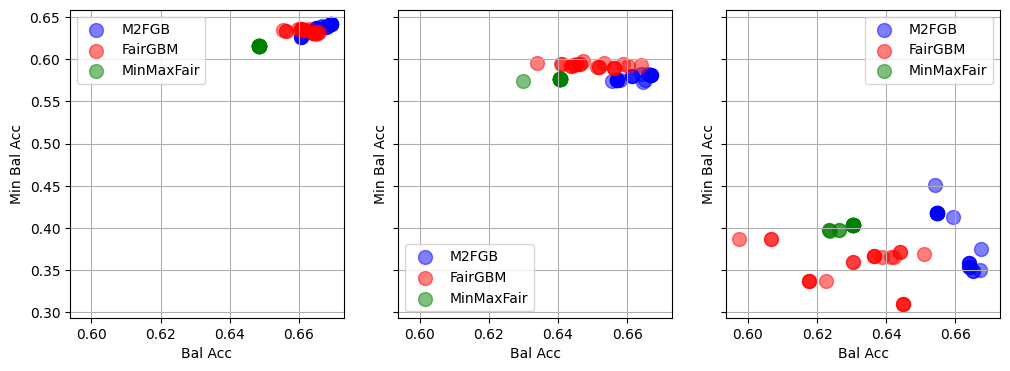

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), sharex = True, sharey = True)


dataset_name = "compas"
for i, n_groups in enumerate([2, 4, 8]):
    model_name = "M2FGB_grad"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    results_m2fgb = get_result_dataframe(dataset_name, model_name, path)

    model_name = "FairGBMClassifier"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    results_fairgbm = get_result_dataframe(dataset_name, model_name, path)

    model_name = "MinMaxFair"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    results_mmfair = get_result_dataframe(dataset_name, model_name, path)


    axs[i].scatter(
        results_m2fgb.bal_acc,
        results_m2fgb.min_bal_acc,
        c = "blue",
        s = 100,
        alpha = 0.5,
        label = "M2FGB"
    )

    axs[i].scatter(
        results_fairgbm.bal_acc,
        results_fairgbm.min_bal_acc,
        c = "red",
        s = 100,
        alpha = 0.5,
        label = "FairGBM",
    )


    axs[i].scatter(
        results_mmfair.bal_acc,
        results_mmfair.min_bal_acc,
        c = "green",
        s = 100,
        alpha = 0.5,
        label = "MinMaxFair",
    )

    axs[i].legend()
    axs[i].set_xlabel("Bal Acc")
    axs[i].set_ylabel("Min Bal Acc")
    axs[i].grid(True)
plt.show()


## Adult

10
10
10
10
10
10


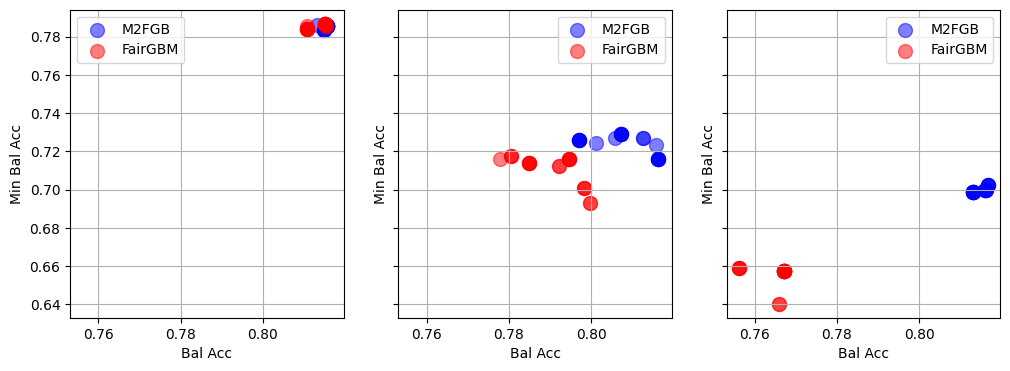

In [4]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), sharex = True, sharey = True)


dataset_name = "adult"
for i, n_groups in enumerate([2, 4, 8]):
    model_name = "M2FGB_grad"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    results_m2fgb = get_result_dataframe(dataset_name, model_name, path)

    model_name = "FairGBMClassifier"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    results_fairgbm = get_result_dataframe(dataset_name, model_name, path)

    model_name = "MinMaxFair"
    path = f"../results/experiment_{n_groups}_groups/{dataset_name}/{model_name}/"
    #results_mmfair = get_result_dataframe(dataset_name, model_name, path)


    axs[i].scatter(
        results_m2fgb.bal_acc,
        results_m2fgb.min_bal_acc,
        c = "blue",
        s = 100,
        alpha = 0.5,
        label = "M2FGB"
    )

    axs[i].scatter(
        results_fairgbm.bal_acc,
        results_fairgbm.min_bal_acc,
        c = "red",
        s = 100,
        alpha = 0.5,
        label = "FairGBM",
    )


    #axs[i].scatter(
    #    results_mmfair.bal_acc,
    #    results_mmfair.min_bal_acc,
    #    c = "green",
    #    s = 100,
    #    alpha = 0.5,
    #    label = "MinMaxFair",
    #)

    axs[i].legend()
    axs[i].set_xlabel("Bal Acc")
    axs[i].set_ylabel("Min Bal Acc")
    axs[i].grid(True)
plt.show()
